In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("household_2020a.csv")

In [10]:
income = df['income'].dropna()

In [11]:
len(income)

18064

In [19]:
n = 100

interval=np.zeros((n,2)) # lower bound, higher bound

for i in range(n):
    sample = np.random.choice(income, size=500, replace=True)
    se = np.std(sample) / np.sqrt(len(sample))
    mn = np.mean(sample)
    lb = mn - 2*se
    hb = mn + 2*se
    interval[i-1][0] = lb
    interval[i-1][1] = hb

In [20]:
df1 = pd.DataFrame(data=interval, columns=["lb","hb"])

In [21]:
df1['mean'] = np.mean(income)

In [22]:
df1.tail()

,lb,hb,mean
95,5171.430683,5982.589317,5494.711138
96,5013.076575,5855.487425,5494.711138
97,4753.770614,5487.377386,5494.711138
98,5109.399178,5858.272822,5494.711138
99,5303.826359,6229.609641,5494.711138


In [23]:
df1['test_l'] = np.where(( df1['mean'] < df1['lb']), 1, 0) # 
df1['test_h'] = np.where(( df1['mean'] > df1['hb']), 1, 0) # 

In [24]:
df1['test_t'] = df1['test_l'] + df1['test_h']

In [25]:
df1.tail()

,lb,hb,mean,test_l,test_h,test_t
95,5171.430683,5982.589317,5494.711138,0,0,0
96,5013.076575,5855.487425,5494.711138,0,0,0
97,4753.770614,5487.377386,5494.711138,0,1,1
98,5109.399178,5858.272822,5494.711138,0,0,0
99,5303.826359,6229.609641,5494.711138,0,0,0


In [26]:
df1['test_t'].sum()

2

In [27]:
#graph

In [28]:
interval

array([[4837.53366498, 5667.24633502],
       [5052.09934442, 5866.41665558],
       [4969.24335324, 5802.22464676],
       [5308.14117809, 6173.40282191],
       [5036.17329503, 7039.07470497],
       [5176.06445138, 6109.68754862],
       [5130.78657571, 6106.11742429],
       [5176.18222648, 6004.04577352],
       [5336.79594911, 6200.32805089],
       [5362.13816188, 6478.19383812],
       [4980.48705336, 5837.30094664],
       [5019.39938639, 5973.69261361],
       [4936.46589233, 5760.88210767],
       [5404.01872988, 6345.61727012],
       [4987.51214134, 5840.42385866],
       [5143.81168875, 6149.76831125],
       [5386.64286384, 6437.29313616],
       [5120.72769289, 6272.20430711],
       [5157.83555493, 6443.90844507],
       [5053.26482781, 6076.91117219],
       [5489.32207733, 6409.10992267],
       [5138.36560853, 6160.82639147],
       [4906.84596722, 5772.88203278],
       [4943.99906575, 5830.92893425],
       [5369.47597466, 6416.38402534],
       [4966.47030314, 58

In [29]:
len(interval)

100

In [33]:
c = [x for x in range(1, 101)]

In [34]:
data_dict = {}
data_dict['category'] = c
data_dict['lower'] = interval[:, 0] 
data_dict['upper'] = interval[:, 1] 
dataset = pd.DataFrame(data_dict)

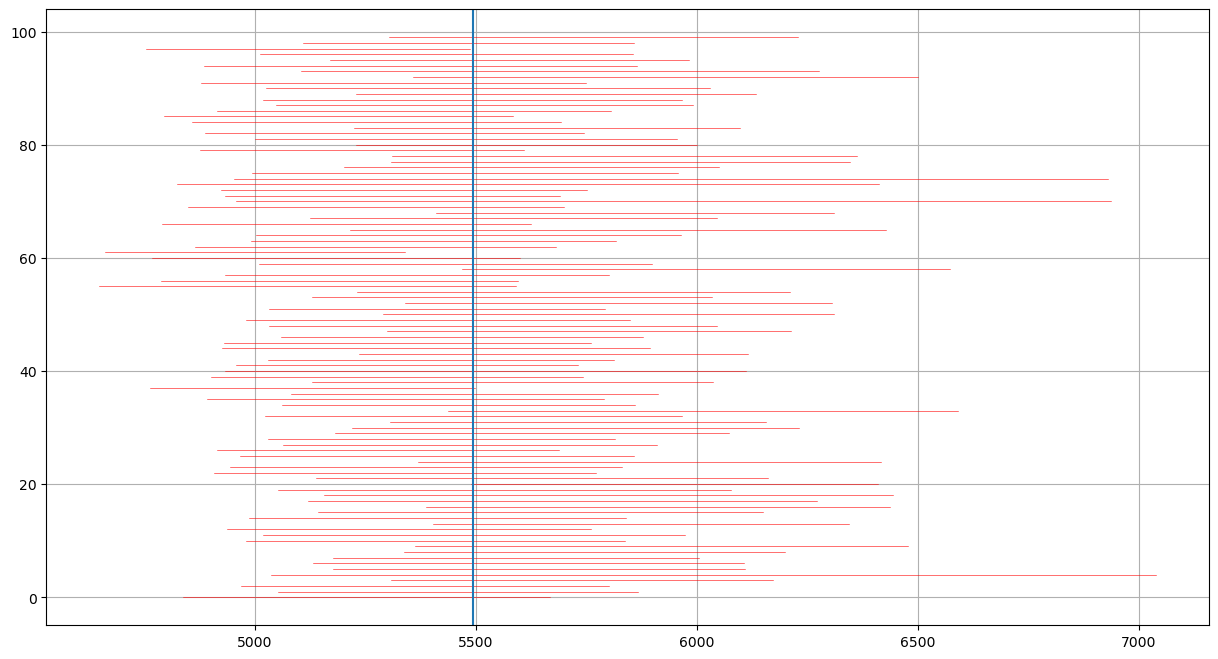

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'-',color='red', linewidth=0.4)
plt.axvline(x=np.mean(income))   
plt.grid()
plt.savefig("income_inverval01.png", dpi=150, bbox_inches='tight')